In [1]:
# Library for accessing the tweets can learn more about it in the tweepy documentation
# tweepy documentation link : https://docs.tweepy.org/en/stable/
import tweepy

In [2]:

#from twitter developer account accessing the twitter getting the access keys and API key

consumer_key = 'lSD9caraPSswymdy5V1QYpYXQ'
consumer_secret = 'VgoAVGCjRiwCztNLORcTRkRHGuPdqXu9VMlEH0rcuJ4LwYWiRo'
access_token = '1492211317-BynNhydaHMQHZ1eFk87CQm4OvQXikGhNsDRfjDC'
access_token_secret = 'pTTyimIJ9wNK8GsPWTwbLCI7hCxA2BFU7BApa3lRptbor'

In [3]:

#authenticating the API through tweepy authentication build-in function can read more about 
#tweepy library in its documentation
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit = True,wait_on_rate_limit_notify= True)


In [52]:
#searching for keyword "covid"
key_word = [['suicide','Suicide'],
            ['Mental','mental'],
            ['Unemployment','unemployment'],
            ['Stress','stress'],
            ['Depression','depression'],
            ['anxiety','Anxiety'],
            ['sleeping','Sleeping'],
            ['gaming','Gaming'],
            ['violence','Violence'],
            ['tobacco','Tobacco'],
            ['headache','Headache'],
           ]

In [11]:
place = api.geo_search(query = 'India',granularity='country')

In [12]:
api.get_user('marinastanley')

User(_api=<tweepy.api.API object at 0x000002010527ADD8>, _json={'id': 42118048, 'id_str': '42118048', 'name': 'Marina Stanley \U0001f6fc\U0001f6fc', 'screen_name': 'marinastanley', 'location': 'New York, New York', 'profile_location': None, 'description': 'Proud NYC Native, Journalist, Live & Breaking News Producer/Showrunner for Digital/TV. @QuickTake Formerly @cbsnews @nyse @NY1 Opinions are mine', 'url': 'https://t.co/aXgACrI6IM', 'entities': {'url': {'urls': [{'url': 'https://t.co/aXgACrI6IM', 'expanded_url': 'http://marinastanley.com', 'display_url': 'marinastanley.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 1406, 'friends_count': 4999, 'listed_count': 31, 'created_at': 'Sat May 23 23:19:09 +0000 2009', 'favourites_count': 25021, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': False, 'statuses_count': 12329, 'lang': None, 'status': {'created_at': 'Sat Jul 17 04:53:10 +0000 2021', 'id': 141625966210680013

In [13]:

user = api.get_user('marinastanley')
  
# fetching the location
location = user.location.split(',')[0]

In [14]:
#location = location.split(',')

In [15]:
location

'New York'

In [17]:
print(str(place[1]).split(',')[1].strip()[4:-1])

88f6c97979c5c22d


    Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Karnataka,Kerala,Chhattisgarh,Uttar Pradesh,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu and Kashmir,Jharkhand,West Bengal,Madhya Pradesh,Maharashtra,Manipur,Meghalaya,Mizoram,Nagaland,Orissa,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttarakhand Uttaranchal

In [18]:
india_states = "Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Karnataka,Kerala,Chhattisgarh,Uttar Pradesh,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu and Kashmir,Jharkhand,West Bengal,Madhya Pradesh,Maharashtra,Manipur,Meghalaya,Mizoram,Nagaland,Orissa,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttarakhand Uttaranchal"

In [19]:
india_states = india_states.split(',')
india_states.append('India')
india_states

['Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Karnataka',
 'Kerala',
 'Chhattisgarh',
 'Uttar Pradesh',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu and Kashmir',
 'Jharkhand',
 'West Bengal',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Orissa',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Telangana',
 'Tripura',
 'Uttarakhand Uttaranchal',
 'India']

**this is used for trail or checking weather the function work properly or not**

In [22]:
'_'.join(key_word)

'mental'

In [26]:
import pandas as pd
import re
from textblob import TextBlob

**cleaning the tweets by removing unwanted character**

In [75]:
def TextClean(tweet):
    tweet = ' '.join(re.sub("(@[A-Za-z0-9_]+)|([^0-9A-Za-z \t])|(\w+:\/\/\s+)|(#+)|(amp)"," ", tweet).split())
    tweet = ' '.join(re.sub('RT+',' ',tweet).split())
    tweet = ' '.join(re.sub('(https[A-Za-z0-9 \t]+)', ' ', tweet).split())
    
    return tweet


**importing libraries for sentiment analysis**

In [72]:
from nltk.sentiment import SentimentIntensityAnalyzer
sent = SentimentIntensityAnalyzer()

**creating function for getting the sentiment score**
    
    using this library we get 4 values 
    positive = 0-1 --> only provide only positive values
    negative = -1,0 --> only provide only negative values
    nautral = 0  --> only provide zero values
    compound = -1,1 --> provide all values between -1 and 1

we are using 'compound' for analysis because we are using the line grapgh for getting severity

In [73]:
def sentimnetScore(tweet):
    score = sent.polarity_scores(tweet)['compound']
    return score

In [74]:
sentimnetScore('Glad to see ground work Indian Youth Congress and NSUI activists across the country for needy and poor people during this Corona epidemic This is the duty of all We fight together and will win Shri CongressiBabbarSherHai')

-0.0772

**getting tweets accordings to hashtag and for the particular location**

In [63]:
limit = 3


In [71]:
def tweet_search(key_word):
    i = 0
    tweets_df = pd.DataFrame(columns = ['Datetime','Tweet_Id','Username'])

#searching for the hashtag -
    for tweet in tweepy.Cursor(api.search, q=key_word, count=3,since = '2018-01-01',lang='en', tweet_mode='extended').items():
        screen_name = tweet.user.screen_name
        try:
            user = api.get_user(screen_name)
            location = user.location

# searcihing hashtage which are tweeted by indian peoples
            if ('Andhra Pradesh' in location) or ('Arunachal Pradesh' in location) or ('Assam' in location) or ('Bihar' in location) or ('Karnataka' in location) or ('Kerala' in location) or ('Chhattisgarh' in location) or ('Uttar Pradesh' in location) or ('Goa' in location) or ('Gujarat' in location) or ('Haryana' in location) or ('Himachal Pradesh' in location) or ('Jammu and Kashmir' in location) or ('Jharkhand' in location) or ('West Bengal' in location) or ('Madhya Pradesh' in location) or ('Maharashtra' in location) or ('Manipur' in location) or ('Meghalaya' in location) or ('Mizoram' in location) or ('Nagaland' in location) or ('Orissa' in location) or ('Punjab' in location) or ('Rajasthan' in location) or ('Sikkim' in location) or ('Tamil Nadu' in location) or ('Telangana' in location) or ('Tripura' in location) or ('Uttarakhand' in location) or ('Uttaranchal' in location) or ('India' in location):
                print('Tweets Downloaded:',i ,'/',limit,end='\r')
                tweets_df = tweets_df.append({'Datetime':tweet.created_at,
                                              'Tweet_Id' : tweet.id_str,
                                              'Username':tweet.user.screen_name,
                                              'Tweet':tweet.full_text}, ignore_index=True)    
                i+=1
            if i>=limit:
                break
            else:
                pass
        except:
            print('user not fount')

# converted all tweets into a CSV file
    tweets_df['Datetime'] = pd.to_datetime(tweets_df['Datetime'], format='%Y.%m.%d %H:%M:%S')   
    tweets_df.set_index('Datetime', inplace=True)
    tweets_df['CleanTweet'] = tweets_df['Tweet'].apply(TextClean)
    tweets_df['SentimentScore'] = tweets_df['CleanTweet'].apply(sentimnetScore)
    tweets_df.to_csv(key_words.split(' OR ')[0] + '_tweets_sentiment.csv', encoding='utf-8')


    return tweets_df


**creading a dataframe**

In [33]:
tweets_df = tweet_search(key_word)


In [34]:
tweets_df.head()

,Tweet_Id,Username,Tweet,CleanTweet,SentimentScore
Datetime,,,,,
2021-07-18 07:19:09,1416658784114462720,MachindranathB4,RT @srd71: #immunityboosteryoga Guru Siyag Sid...,immunityboosteryoga Guru Siyag SiddhaYoga is o...,-0.2960
2021-07-18 07:19:04,1416658763025510402,MachindranathB4,RT @AartiJa64104564: #immunityboosteryoga ...,immunityboosteryoga Mental health issues are g...,0.5574
2021-07-18 07:18:30,1416658621048315904,memes_therapies,RT @vishcomical: Taarak Mehta Old Episodes sho...,Taarak Mehta Old Episodes should officially be...,0.0000
2021-07-18 07:18:22,1416658590216065033,ok__listen,RT @vishcomical: Taarak Mehta Old Episodes sho...,Taarak Mehta Old Episodes should officially be...,0.0000
2021-07-18 07:18:22,1416658588660113411,atlantis1021,@LandofLincoln39 @_NotPrisons GFOH.. She wasn’...,GFOH She wasn t suffering from a mental illnes...,-0.9236


In [35]:
tweets_df.tail()

,Tweet_Id,Username,Tweet,CleanTweet,SentimentScore
Datetime,,,,,
2021-07-18 07:18:16,1416658563670306817,Stan_Sidharth,RT @sulachi11: The series came out at the peak...,The series came out at the peak of the second ...,-0.5499
2021-07-18 07:17:45,1416658434854772739,Claudia_53853,Dealing with this false cases has given us men...,Dealing with this false cases has given us men...,-0.0258
2021-07-18 07:17:09,1416658283323027461,theprayagtiwari,RT @vishcomical: Taarak Mehta Old Episodes sho...,Taarak Mehta Old Episodes should officially be...,0.0000
2021-07-18 07:16:39,1416658158164996098,___shivaniii,RT @vishcomical: Taarak Mehta Old Episodes sho...,Taarak Mehta Old Episodes should officially be...,0.0000
2021-07-18 07:16:15,1416658054968270848,_sangameshT,RT @vishcomical: Taarak Mehta Old Episodes sho...,Taarak Mehta Old Episodes should officially be...,0.0000


In [58]:
' or '.join(key_word).split(' or ')[0]

'suicide'

**getting datasets for different keywords**

In [65]:
for i in key_word:
    key_words = ' OR '.join(i)
    tweet_search(key_words)

Rate limit reached. Sleeping for: 99


Rate limit reached. Sleeping for: 125


In [67]:
tweets_df.head()

,Tweet_Id,Username,Tweet,CleanTweet,SentimentScore
Datetime,,,,,
2021-07-18 07:19:09,1416658784114462720,MachindranathB4,RT @srd71: #immunityboosteryoga Guru Siyag Sid...,immunityboosteryoga Guru Siyag SiddhaYoga is o...,-0.2960
2021-07-18 07:19:04,1416658763025510402,MachindranathB4,RT @AartiJa64104564: #immunityboosteryoga ...,immunityboosteryoga Mental health issues are g...,0.5574
2021-07-18 07:18:30,1416658621048315904,memes_therapies,RT @vishcomical: Taarak Mehta Old Episodes sho...,Taarak Mehta Old Episodes should officially be...,0.0000
2021-07-18 07:18:22,1416658590216065033,ok__listen,RT @vishcomical: Taarak Mehta Old Episodes sho...,Taarak Mehta Old Episodes should officially be...,0.0000
2021-07-18 07:18:22,1416658588660113411,atlantis1021,@LandofLincoln39 @_NotPrisons GFOH.. She wasn’...,GFOH She wasn t suffering from a mental illnes...,-0.9236


<IPython.core.display.Javascript object>

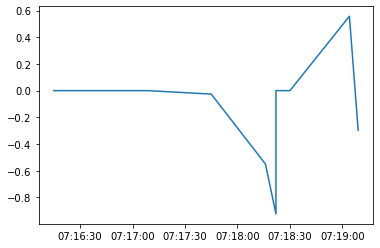

In [68]:
plt.plot(tweets_df.index,tweets_df['SentimentScore'])